# **Problem Statement :Customer Segmentation Analysis**

# **1.Download the dataset**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import scale 
import warnings 
warnings.filterwarnings('ignore')

# **2.load the dataset into the tool**

In [46]:
data=pd.read_csv("Mall_Customers.csv")


In [47]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
data.shape

(200, 5)

In [49]:
data.size

1000

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# **Perform Below Visulizations**

### Univariate Analysis

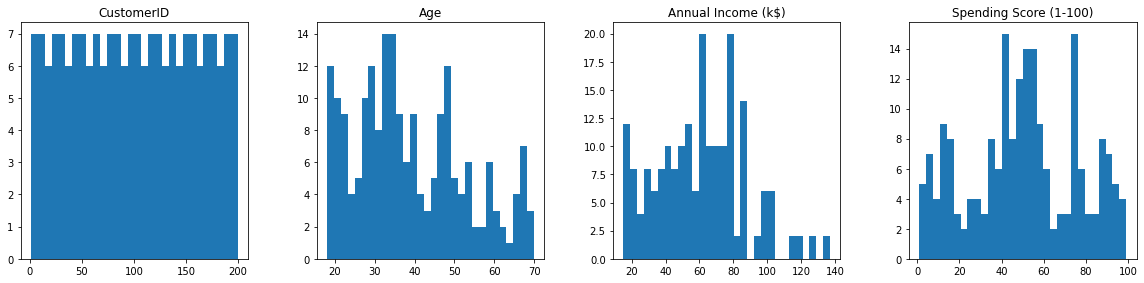

In [51]:
data.hist(figsize=(20,10), grid=False, layout=(2,4),bins=30)
plt.show()

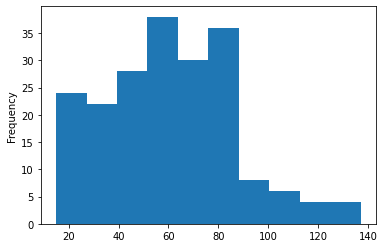

In [52]:
data["Annual Income (k$)"].plot(kind='hist')

### Bi-variate Analysis

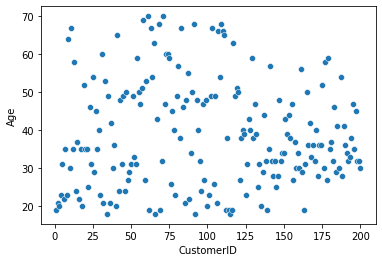

In [53]:
sns.scatterplot(data.CustomerID,data.Age)

### Multi -Variate Analysis

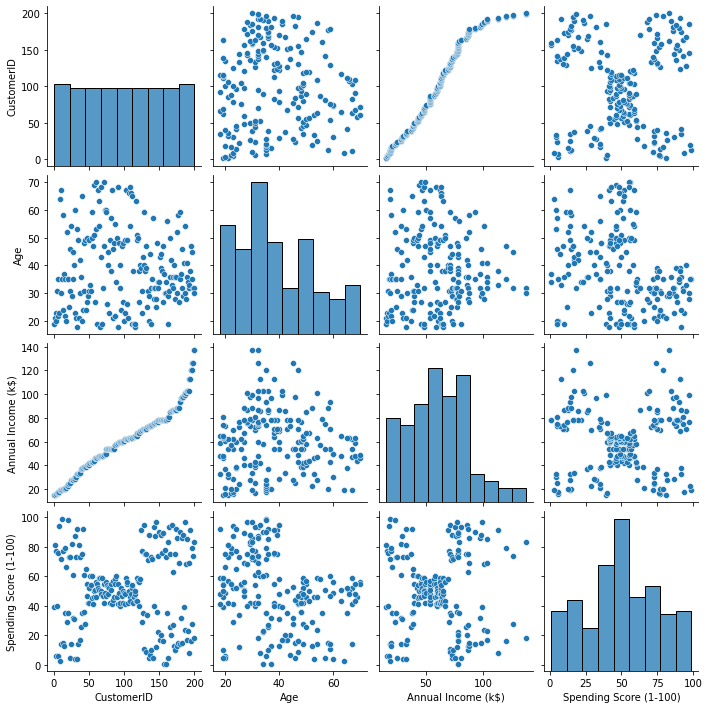

In [54]:
sns.pairplot(data)

# **4.Perform descriptive statistics on the dataset**

In [55]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **5.Check for Missing values and deal with them**

data.isna().sum()

# **6.Find the outliers and replace them outliers.**

In [56]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

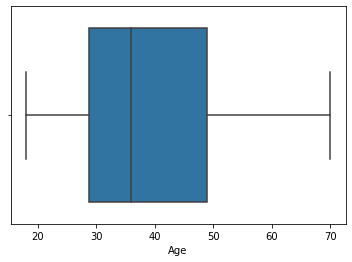

In [57]:
sns.boxplot(x=data['Age'],data=data)

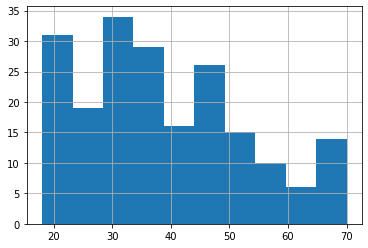

In [58]:
data['Age'].hist()

In [59]:
print('skewness value of Age:',data['Age'].skew())

skewness value of Age: 0.48556885096681657


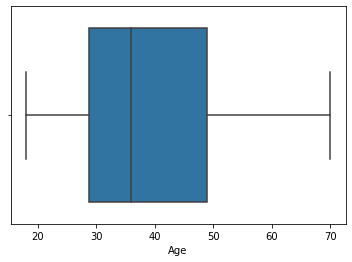

In [60]:
sns.boxplot(x=data['Age'],data=data)

# **7.Check for Categorical columns and perform encoding**

In [61]:
data.info 

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [63]:
data["Gender"].unique()

array([1, 0])

# **8. Scaling the Data**

In [64]:
x=data.drop(columns=['Gender','Age'])
print(x)

     CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1                  15                      39
1             2                  15                      81
2             3                  16                       6
3             4                  16                      77
4             5                  17                      40
..          ...                 ...                     ...
195         196                 120                      79
196         197                 126                      28
197         198                 126                      74
198         199                 137                      18
199         200                 137                      83

[200 rows x 3 columns]


In [65]:
S=scale(x)
print(S)

[[-1.7234121  -1.73899919 -0.43480148]
 [-1.70609137 -1.73899919  1.19570407]
 [-1.68877065 -1.70082976 -1.71591298]
 [-1.67144992 -1.70082976  1.04041783]
 [-1.6541292  -1.66266033 -0.39597992]
 [-1.63680847 -1.66266033  1.00159627]
 [-1.61948775 -1.62449091 -1.71591298]
 [-1.60216702 -1.62449091  1.70038436]
 [-1.5848463  -1.58632148 -1.83237767]
 [-1.56752558 -1.58632148  0.84631002]
 [-1.55020485 -1.58632148 -1.4053405 ]
 [-1.53288413 -1.58632148  1.89449216]
 [-1.5155634  -1.54815205 -1.36651894]
 [-1.49824268 -1.54815205  1.04041783]
 [-1.48092195 -1.54815205 -1.44416206]
 [-1.46360123 -1.54815205  1.11806095]
 [-1.4462805  -1.50998262 -0.59008772]
 [-1.42895978 -1.50998262  0.61338066]
 [-1.41163905 -1.43364376 -0.82301709]
 [-1.39431833 -1.43364376  1.8556706 ]
 [-1.3769976  -1.39547433 -0.59008772]
 [-1.35967688 -1.39547433  0.88513158]
 [-1.34235616 -1.3573049  -1.75473454]
 [-1.32503543 -1.3573049   0.88513158]
 [-1.30771471 -1.24279661 -1.4053405 ]
 [-1.29039398 -1.24279661

# **9.Perform any of the clustering algorithms**

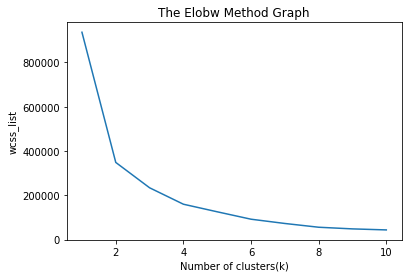

In [66]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# **10. Add the cluster data with the primary dataset**

In [67]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
clus= kmeans.fit_predict(S)

In [68]:
clus

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

# **11. Split the data into dependent and independent variables**

In [69]:
x=data.drop(columns=['Annual Income (k$)'],axis=1)
print(x)

     CustomerID  Gender  Age  Spending Score (1-100)
0             1       1   19                      39
1             2       1   21                      81
2             3       0   20                       6
3             4       0   23                      77
4             5       0   31                      40
..          ...     ...  ...                     ...
195         196       0   35                      79
196         197       0   45                      28
197         198       1   32                      74
198         199       1   32                      18
199         200       1   30                      83

[200 rows x 4 columns]


In [70]:
y=data['Annual Income (k$)']
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

# **12. Split the data into training and testing**

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state=1)

In [72]:
x_train

,CustomerID,Gender,Age,Spending Score (1-100)
116,117,0,63,43
67,68,0,68,48
78,79,0,23,52
42,43,1,48,36
17,18,1,20,66
...,...,...,...,...
133,134,0,31,71
137,138,1,32,73
72,73,0,60,49
140,141,0,57,5


In [73]:
x_train.shape

(140, 4)

In [74]:
x_test

,CustomerID,Gender,Age,Spending Score (1-100)
58,59,0,27,51
40,41,0,65,35
34,35,0,49,14
102,103,1,67,59
184,185,0,41,39
198,199,1,32,18
95,96,1,24,52
4,5,0,31,40
29,30,0,23,87
168,169,0,36,27


In [75]:
x_test.shape

(60, 4)

In [76]:
y_train

116    65
67     48
78     54
42     39
17     21
       ..
133    72
137    73
72     50
140    75
37     34
Name: Annual Income (k$), Length: 140, dtype: int64

# **13.Build the model**

In [77]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

# **14.Train the Model**

In [78]:
LR.fit(x_train,y_train)

LinearRegression()

# **15.Test the model**

In [79]:
pred=LR.predict(x_test)

In [80]:
pred

array([ 41.79651469,  35.44897396,  32.32182941,  62.15230947,
        97.15499   , 102.74527464,  57.52904542,  18.50596884,
        28.90050195,  90.05616474,  90.63951146,  25.17877999,
        21.47607213,  56.15450717,  65.58284431,  68.81365504,
        85.74449988,  31.45756756,  76.51559556,  42.98039276,
        38.70178627,  23.89238204,  36.61730406,  57.67164216,
        29.74845621,  86.65460588,  33.53032334,  29.31235764,
       100.75984295,  28.3364555 ,  37.02836966,  88.57006476,
       101.81449573,  93.23392219,  94.16104415,  58.75918464,
        93.31570423,  49.53263905,  46.78164703,  91.618992  ,
        64.85923756,  63.89021447,  98.96847593,  22.93975353,
        41.82689378,  24.95860094,  65.82297944,  33.18229176,
        96.7187877 ,  70.4300092 ,  59.76768524,  70.1173078 ,
        69.1581952 ,  40.54244593,  30.19338393,  94.32293272,
        95.33656664,  64.12923371, 102.85955135,  76.19945402])

In [81]:
pred.astype(int)

array([ 41,  35,  32,  62,  97, 102,  57,  18,  28,  90,  90,  25,  21,
        56,  65,  68,  85,  31,  76,  42,  38,  23,  36,  57,  29,  86,
        33,  29, 100,  28,  37,  88, 101,  93,  94,  58,  93,  49,  46,
        91,  64,  63,  98,  22,  41,  24,  65,  33,  96,  70,  59,  70,
        69,  40,  30,  94,  95,  64, 102,  76])

In [82]:
y_test

58      46
40      38
34      33
102     62
184     99
198    137
95      60
4       17
29      29
168     87
171     87
18      23
11      19
89      58
110     63
118     67
159     78
35      33
136     73
59      46
51      42
16      21
44      39
94      60
31      30
162     81
38      37
28      29
193    113
27      28
47      40
165     85
194    120
177     88
176     88
97      60
174     88
73      50
69      48
172     87
108     63
107     63
189    103
14      20
56      44
19      23
114     65
39      37
185     99
124     70
98      61
123     69
119     67
53      43
33      33
179     93
181     97
106     63
199    137
138     74
Name: Annual Income (k$), dtype: int64

# **16.Measure the performance using Evaluation Metrics.**

In [83]:
from sklearn.metrics import r2_score
score=r2_score(pred,y_test)

In [84]:
score

0.9234274149757858